In [5]:
import numpy as np 
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
allData = pd.read_csv("journal.pone.0185912.s003.csv")
allData.head()

,Source,Site_source,Target,Site_target,Transfers,Year,Week
0,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2014,48
1,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,49
2,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,50
3,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2014,51
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1


In [7]:
print(np.unique(allData.Site_source.values, return_counts=True))
print(np.unique(allData.Site_target.values, return_counts=True))
#allData.Site_source.values.nunique


(array(['DH', 'Orpington', 'PRUH'], dtype=object), array([17675,   291, 13372]))
(array(['DH', 'Orpington', 'PRUH'], dtype=object), array([18121,   480, 12737]))


In [8]:
allData['FullSourceName'] = allData.Source + allData.Site_source
allData['FullTargetName'] = allData.Target + allData.Site_target

#allTransfers = np.intersect1d(np.unique(allData.FullSourceName),np.unique(allData.FullTargetName))
print(np.unique(allData.FullSourceName.values).shape)

print(np.unique(allData.FullTargetName.values).shape)
allTransfers = [i for i in np.unique(allData.FullTargetName) if i not in np.unique(allData.FullSourceName)]
print(len(allTransfers), allTransfers)
allTransfers = np.unique(allData.FullSourceName).tolist() + allTransfers 
print(len(allTransfers))
#allData.head()

(77,)
(80,)
3 ['ExitHospitalDH', 'ExitHospitalOrpington', 'ExitHospitalPRUH']
80


In [25]:
allData['Transfer'] = allData.FullSourceName +'='+ allData.FullTargetName

groupedByTransfer = allData.groupby('Transfer').sum()
print(groupedByTransfer.head())
listOfEdges = []
j=0
for i in np.unique(allData.Transfer.values):
    a,b = i.split('=')
    listOfEdges.append([a,b,groupedByTransfer.Transfers.values[j]])
    j += 1
len(listOfEdges)
listOfEdges

                                                    Transfers    Year  Week
Transfer                                                                   
AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH                194  143084  1689
AcuteMedicalUnit.EAUPRUH=CheereDH                           3    4029    98
AcuteMedicalUnit.EAUPRUH=ChristineBrownCritical...          3    6044    78
AcuteMedicalUnit.EAUPRUH=ClinicalDecisionUnit.P...         17   28213   421
AcuteMedicalUnit.EAUPRUH=CoronaryCareUnit.PRUH....        413  169281  1979


[['AcuteMedicalUnit.EAUPRUH', 'ChartwellUnitPRUH', 194],
 ['AcuteMedicalUnit.EAUPRUH', 'CheereDH', 3],
 ['AcuteMedicalUnit.EAUPRUH', 'ChristineBrownCriticalCareDH', 3],
 ['AcuteMedicalUnit.EAUPRUH', 'ClinicalDecisionUnit.PRUHPRUH', 17],
 ['AcuteMedicalUnit.EAUPRUH', 'CoronaryCareUnit.PRUH.PRUH', 413],
 ['AcuteMedicalUnit.EAUPRUH', 'CoronaryCareUnit.SamOram.DH', 7],
 ['AcuteMedicalUnit.EAUPRUH', 'CottonDH', 1],
 ['AcuteMedicalUnit.EAUPRUH', 'DavidMarsdenDH', 5],
 ['AcuteMedicalUnit.EAUPRUH', 'DischargeLoungePRUH', 691],
 ['AcuteMedicalUnit.EAUPRUH', 'DonneDH', 1],
 ['AcuteMedicalUnit.EAUPRUH', 'ExitHospitalPRUH', 2713],
 ['AcuteMedicalUnit.EAUPRUH', 'FarnboroughDayWardPRUH', 1],
 ['AcuteMedicalUnit.EAUPRUH', 'FarnboroughWardPRUH', 342],
 ['AcuteMedicalUnit.EAUPRUH', 'Fisk.CheereHDUDH', 1],
 ['AcuteMedicalUnit.EAUPRUH', 'FiskDH', 8],
 ['AcuteMedicalUnit.EAUPRUH', 'GuthrieDH', 1],
 ['AcuteMedicalUnit.EAUPRUH', 'HASU.HyperAcuteStrokeUnit.PRUH.PRUH', 115],
 ['AcuteMedicalUnit.EAUPRUH', 'Int

<IPython.core.display.Javascript object>


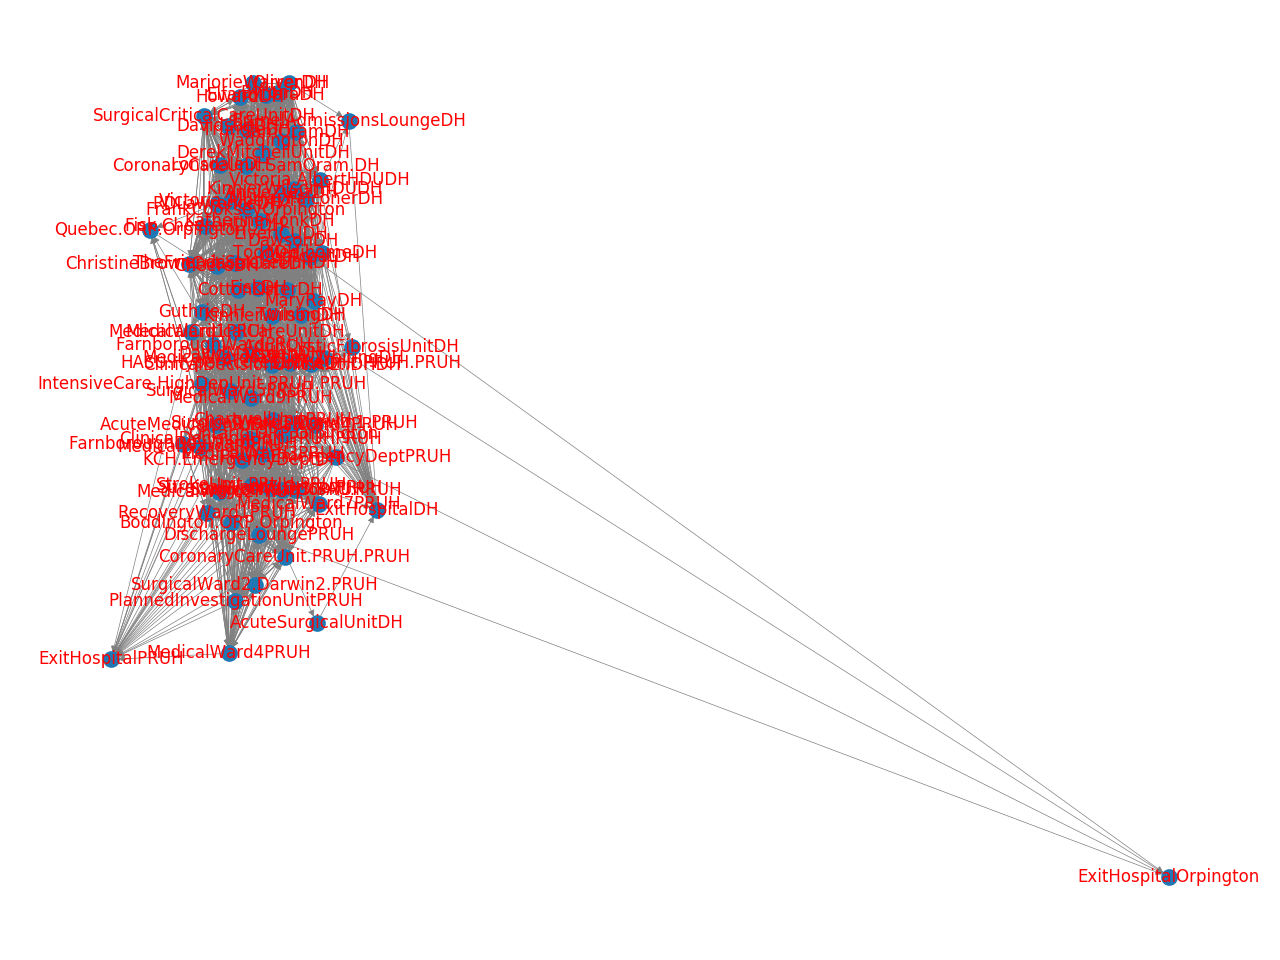

In [26]:
wholeNetwork = nx.MultiDiGraph()
wholeNetwork.add_nodes_from(allTransfers)
wholeNetwork.add_weighted_edges_from(listOfEdges)
pos = nx.kamada_kawai_layout(wholeNetwork)
nx.draw(wholeNetwork,pos=pos, with_labels=True, font_size=6,font_color='red',node_size = 25, width = 0.25, edge_color = 'grey',arrowsize=5)

#plt.rcParams['figure.figsize'] = [10, 5]
#plt.show()

#  Degree distribution

In [11]:
#print(type(list(wholeNetwork.in_degree())[0]))
In = list(wholeNetwork.in_degree())
listOfInDegrees = [x[1] for x in In]

listOfInDegreesNames = [x[0] for x in In]

print(In)

print(listOfInDegreesNames[listOfInDegrees.index(max(listOfInDegrees))])


#print(listOfInDegrees)
plt.hist(listOfInDegrees, bins=100)
plt.show()

[('AcuteMedicalUnit.EAUPRUH', 27), ('AcuteSurgicalUnitDH', 1), ('AdultCysticFibrosisUnitDH', 2), ('AnnieZunzDH', 33), ('Boddington.ORP.Orpington', 8), ('BrunelAdmissionsLoungeDH', 2), ('ByronDH', 31), ('ChartwellUnitPRUH', 22), ('CheereDH', 31), ('ChristineBrownCriticalCareDH', 43), ('ClinicalDecisionUnit.A.E..DHDH', 20), ('ClinicalDecisionUnit.PRUHPRUH', 18), ('CoptcoatDH', 30), ('CoronaryCareUnit.PRUH.PRUH', 30), ('CoronaryCareUnit.SamOram.DH', 26), ('CottonDH', 46), ('DavidMarsdenDH', 44), ('DavidsonDH', 31), ('DawsonDH', 40), ('DerekMitchellUnitDH', 29), ('DischargeLoungePRUH', 27), ('DonneDH', 34), ('ElfandLibraDH', 33), ('FarnboroughDayWardPRUH', 5), ('FarnboroughWardPRUH', 33), ('Fisk.CheereHDUDH', 14), ('FiskDH', 50), ('FrankCookseyOrpington', 12), ('GuthrieDH', 39), ('HASU.HyperAcuteStrokeUnit.PRUH.PRUH', 32), ('HowardDH', 28), ('IntensiveCare.HighDepUnit.PRUH.PRUH', 29), ('KCH.EmergencyDeptDH', 30), ('KatherineMonkDH', 38), ('KinnierWilsonDH', 31), ('KinnierWilsonHDUDH', 23),

In [12]:
#print(type(list(wholeNetwork.out_degree())[0]))
Out = list(wholeNetwork.out_degree())

#print(L)
listOfOutDegrees = [x[1] for x in Out]
listOfOutDegreesNames = [x[0] for x in Out]

print(Out, listOfOutDegrees[0], listOfOutDegreesNames[0])

print(listOfOutDegreesNames[listOfOutDegrees.index(max(listOfOutDegrees))])
print(listOfOutDegrees.index(max(listOfOutDegrees)))
plt.hist(listOfOutDegrees,bins=464)
plt.show()

[('AcuteMedicalUnit.EAUPRUH', 46), ('AcuteSurgicalUnitDH', 1), ('AdultCysticFibrosisUnitDH', 6), ('AnnieZunzDH', 42), ('Boddington.ORP.Orpington', 13), ('BrunelAdmissionsLoungeDH', 2), ('ByronDH', 28), ('ChartwellUnitPRUH', 26), ('CheereDH', 37), ('ChristineBrownCriticalCareDH', 43), ('ClinicalDecisionUnit.A.E..DHDH', 50), ('ClinicalDecisionUnit.PRUHPRUH', 40), ('CoptcoatDH', 21), ('CoronaryCareUnit.PRUH.PRUH', 37), ('CoronaryCareUnit.SamOram.DH', 17), ('CottonDH', 40), ('DavidMarsdenDH', 41), ('DavidsonDH', 33), ('DawsonDH', 28), ('DerekMitchellUnitDH', 19), ('DischargeLoungePRUH', 14), ('DonneDH', 18), ('ElfandLibraDH', 31), ('FarnboroughDayWardPRUH', 5), ('FarnboroughWardPRUH', 34), ('Fisk.CheereHDUDH', 7), ('FiskDH', 37), ('FrankCookseyOrpington', 8), ('GuthrieDH', 27), ('HASU.HyperAcuteStrokeUnit.PRUH.PRUH', 33), ('HowardDH', 26), ('IntensiveCare.HighDepUnit.PRUH.PRUH', 29), ('KCH.EmergencyDeptDH', 62), ('KatherineMonkDH', 40), ('KinnierWilsonDH', 34), ('KinnierWilsonHDUDH', 14), 

In [13]:
#print(allTransfers)
nodeMetrics = pd.DataFrame({'Node':listOfInDegreesNames})
nodeMetrics['InDegree'] = listOfInDegrees
nodeMetrics['OutDegree'] = listOfOutDegrees

print(nodeMetrics[nodeMetrics['Node'] == 'KCH.EmergencyDeptDH'])

nodeMetrics.loc[nodeMetrics['InDegree'].idxmax()]

                   Node  InDegree  OutDegree
32  KCH.EmergencyDeptDH        30         62


Node         FiskDH
InDegree         50
OutDegree        37
Name: 26, dtype: object

In [14]:
allData[allData['FullSourceName'] =='KCH.EmergencyDeptDH'].Transfer.nunique()

62

In [15]:
allTransfers

['AcuteMedicalUnit.EAUPRUH',
 'AcuteSurgicalUnitDH',
 'AdultCysticFibrosisUnitDH',
 'AnnieZunzDH',
 'Boddington.ORP.Orpington',
 'BrunelAdmissionsLoungeDH',
 'ByronDH',
 'ChartwellUnitPRUH',
 'CheereDH',
 'ChristineBrownCriticalCareDH',
 'ClinicalDecisionUnit.A.E..DHDH',
 'ClinicalDecisionUnit.PRUHPRUH',
 'CoptcoatDH',
 'CoronaryCareUnit.PRUH.PRUH',
 'CoronaryCareUnit.SamOram.DH',
 'CottonDH',
 'DavidMarsdenDH',
 'DavidsonDH',
 'DawsonDH',
 'DerekMitchellUnitDH',
 'DischargeLoungePRUH',
 'DonneDH',
 'ElfandLibraDH',
 'FarnboroughDayWardPRUH',
 'FarnboroughWardPRUH',
 'Fisk.CheereHDUDH',
 'FiskDH',
 'FrankCookseyOrpington',
 'GuthrieDH',
 'HASU.HyperAcuteStrokeUnit.PRUH.PRUH',
 'HowardDH',
 'IntensiveCare.HighDepUnit.PRUH.PRUH',
 'KCH.EmergencyDeptDH',
 'KatherineMonkDH',
 'KinnierWilsonDH',
 'KinnierWilsonHDUDH',
 'ListerDH',
 'LiverICUDH',
 'LonsdaleDH',
 'MarjorieWarrenDH',
 'MaryRayDH',
 'MatthewWhitingDH',
 'MedicalCriticalCareUnitDH',
 'MedicalWard1PRUH',
 'MedicalWard2PRUH',
 'Me

# Centrality


In [16]:
eigenvectorCentrality = nx.eigenvector_centrality_numpy(wholeNetwork)
print(eigenvectorCentrality)
listOfEigCentrality = []
#for i in listOfInDegreesNames:
[x[1] for x in eigenvectorCentrality]
nodeMetrics['Eigenvector Centrality'] = listOfEigCentrality

nodeMetrics.head()

{'AcuteMedicalUnit.EAUPRUH': 0.04008109123121423, 'AcuteSurgicalUnitDH': 0.0020900407922411542, 'AdultCysticFibrosisUnitDH': 0.006100867434634975, 'AnnieZunzDH': 0.15815330647598966, 'Boddington.ORP.Orpington': 0.010863819098968644, 'BrunelAdmissionsLoungeDH': 0.011193683439245167, 'ByronDH': 0.1484726278786657, 'ChartwellUnitPRUH': 0.037581631570343575, 'CheereDH': 0.1317664958793836, 'ChristineBrownCriticalCareDH': 0.18776548823800407, 'ClinicalDecisionUnit.A.E..DHDH': 0.0766870104861375, 'ClinicalDecisionUnit.PRUHPRUH': 0.02690204245344902, 'CoptcoatDH': 0.1410657731692672, 'CoronaryCareUnit.PRUH.PRUH': 0.05468243118673537, 'CoronaryCareUnit.SamOram.DH': 0.10959834610631816, 'CottonDH': 0.19127800535115194, 'DavidMarsdenDH': 0.1545269933760645, 'DavidsonDH': 0.14983378656706955, 'DawsonDH': 0.17072187672572545, 'DerekMitchellUnitDH': 0.13790273967920616, 'DischargeLoungePRUH': 0.04018554510523791, 'DonneDH': 0.15409047446444213, 'ElfandLibraDH': 0.15343603519433632, 'FarnboroughDayW

ValueError: Length of values does not match length of index

# Betweeness

In [ ]:
betweennessCentrality = nx.betweenness_centrality(wholeNetwork,normalized=True)